<a href="https://colab.research.google.com/github/richardtekere09/XAI_TransUnet/blob/main/transUnet_explainable_XAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install torch torchvision timm monai shap captum matplotlib opencv-python tqdm


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 48.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
   

Download Dataset

In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("dschettler8845/brats-2021-task1")

print("Path to dataset files:", path)


100%|██████████| 12.3G/12.3G [06:04<00:00, 36.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1


In [7]:
!ls -lh /root/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1


total 13G
-rw-r--r-- 1 root root 9.9M Feb 27 23:11 BraTS2021_00495.tar
-rw-r--r-- 1 root root  11M Feb 27 23:11 BraTS2021_00621.tar
-rw-r--r-- 1 root root  13G Feb 27 23:14 BraTS2021_Training_Data.tar


In [8]:
!mv /root/.cache/kagglehub/datasets/dschettler8845/brats-2021-task1/versions/1 /content/BraTS2021/


In [17]:
!mkdir -p /content/BraTS2021_extracted  # Create a folder for extracted data

# Extract each `.tar` file
!tar -xvf /content/BraTS2021/BraTS2021_Training_Data.tar -C /content/BraTS2021_extracted/
!tar -xvf /content/BraTS2021/BraTS2021_00621.tar -C /content/BraTS2021_extracted/
!tar -xvf /content/BraTS2021/BraTS2021_00495.tar -C /content/BraTS2021_extracted/



Streaming output truncated to the last 5000 lines.
./BraTS2021_00593/BraTS2021_00593_t1ce.nii.gz
./BraTS2021_00593/BraTS2021_00593_t2.nii.gz
./BraTS2021_00594/
./BraTS2021_00594/BraTS2021_00594_flair.nii.gz
./BraTS2021_00594/BraTS2021_00594_seg.nii.gz
./BraTS2021_00594/BraTS2021_00594_t1.nii.gz
./BraTS2021_00594/BraTS2021_00594_t1ce.nii.gz
./BraTS2021_00594/BraTS2021_00594_t2.nii.gz
./BraTS2021_00596/
./BraTS2021_00596/BraTS2021_00596_flair.nii.gz
./BraTS2021_00596/BraTS2021_00596_seg.nii.gz
./BraTS2021_00596/BraTS2021_00596_t1.nii.gz
./BraTS2021_00596/BraTS2021_00596_t1ce.nii.gz
./BraTS2021_00596/BraTS2021_00596_t2.nii.gz
./BraTS2021_00597/
./BraTS2021_00597/BraTS2021_00597_flair.nii.gz
./BraTS2021_00597/BraTS2021_00597_seg.nii.gz
./BraTS2021_00597/BraTS2021_00597_t1.nii.gz
./BraTS2021_00597/BraTS2021_00597_t1ce.nii.gz
./BraTS2021_00597/BraTS2021_00597_t2.nii.gz
./BraTS2021_00598/
./BraTS2021_00598/BraTS2021_00598_flair.nii.gz
./BraTS2021_00598/BraTS2021_00598_seg.nii.gz
./BraTS2021_0

In [22]:
!ls -lh /content/BraTS2021_extracted/


total 25M
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00000
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00002
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00003
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00005
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00006
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00008
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00009
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00011
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00012
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00014
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00016
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00017
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00018
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00019
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00020
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00021
drwxrwxr-x 2 501 staff 4.0K Jul  6  2021 BraTS2021_00022
drwxrwxr-x 2 501 staf

In [23]:
!ls -lh /content/BraTS2021_extracted/BraTS2021_01377/


total 8.3M
-rw-rw-r-- 1 501 staff 2.0M Jul  6  2021 BraTS2021_01377_flair.nii.gz
-rw-rw-r-- 1 501 staff 113K Jul  6  2021 BraTS2021_01377_seg.nii.gz
-rw-rw-r-- 1 501 staff 2.1M Jul  6  2021 BraTS2021_01377_t1ce.nii.gz
-rw-rw-r-- 1 501 staff 2.0M Jul  6  2021 BraTS2021_01377_t1.nii.gz
-rw-rw-r-- 1 501 staff 2.2M Jul  6  2021 BraTS2021_01377_t2.nii.gz


**Loading MRI dataset**
using the BraTS 2021 dataset for brain tumor segmentation.

Update File Path Selection

In [25]:
import glob

# Get all patient folders
patient_folders = sorted(glob.glob("/content/BraTS2021_extracted/BraTS2021_*"))

# Collect paths for MRI scans (FLAIR) and segmentation masks
image_paths = []
mask_paths = []

for folder in patient_folders:
    flair_files = glob.glob(f"{folder}/*_flair.nii.gz")  # FLAIR images
    seg_files = glob.glob(f"{folder}/*_seg.nii.gz")  # Segmentation masks

    # Ensure both files exist before adding them
    if flair_files and seg_files:
        image_paths.append(flair_files[0])  # First FLAIR image
        mask_paths.append(seg_files[0])  # First segmentation mask
    else:
        print(f"⚠️ Warning: Missing files in {folder}")

print(f"✅ Found {len(image_paths)} MRI images")
print(f"✅ Found {len(mask_paths)} segmentation masks")


⚠️ Warning: Missing files in /content/BraTS2021_extracted/BraTS2021_00495_flair.nii.gz
⚠️ Warning: Missing files in /content/BraTS2021_extracted/BraTS2021_00495_seg.nii.gz
⚠️ Warning: Missing files in /content/BraTS2021_extracted/BraTS2021_00495_t1.nii.gz
⚠️ Warning: Missing files in /content/BraTS2021_extracted/BraTS2021_00495_t1ce.nii.gz
⚠️ Warning: Missing files in /content/BraTS2021_extracted/BraTS2021_00495_t2.nii.gz
⚠️ Warning: Missing files in /content/BraTS2021_extracted/BraTS2021_00621_flair.nii.gz
⚠️ Warning: Missing files in /content/BraTS2021_extracted/BraTS2021_00621_seg.nii.gz
⚠️ Warning: Missing files in /content/BraTS2021_extracted/BraTS2021_00621_t1.nii.gz
⚠️ Warning: Missing files in /content/BraTS2021_extracted/BraTS2021_00621_t1ce.nii.gz
⚠️ Warning: Missing files in /content/BraTS2021_extracted/BraTS2021_00621_t2.nii.gz
✅ Found 1251 MRI images
✅ Found 1251 segmentation masks


Load and Display an MRI Scan

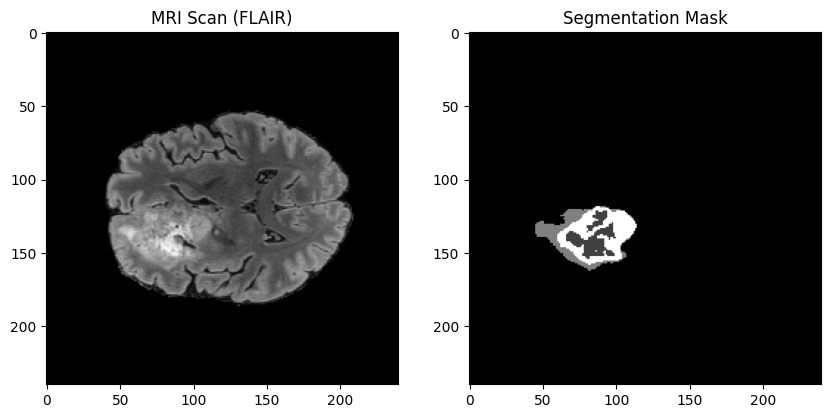

In [26]:
import monai
import matplotlib.pyplot as plt
import numpy as np

# Load first MRI image and mask
image = monai.transforms.LoadImage(image_only=True)(image_paths[0])
mask = monai.transforms.LoadImage(image_only=True)(mask_paths[0])

# Convert to numpy arrays
image_np = np.array(image)
mask_np = np.array(mask)

# Display the MRI and segmentation mask
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np[:, :, image_np.shape[-1]//2], cmap="gray")  # Show middle slice
plt.title("MRI Scan (FLAIR)")

plt.subplot(1, 2, 2)
plt.imshow(mask_np[:, :, mask_np.shape[-1]//2], cmap="gray")  # Show middle slice
plt.title("Segmentation Mask")

plt.show()


In [6]:
import torch
import monai
import glob
import numpy as np
from monai.transforms import Compose, LoadImage, Resize, ToTensor
from monai.data import Dataset, DataLoader

# Define transformations
transform = Compose([
    LoadImage(image_only=True),
    Resize((224, 224)),  # Resize for TransUNet input
    ToTensor()
])

# Load dataset paths
image_paths = sorted(glob.glob("BraTS2021/images/*.nii.gz"))
mask_paths = sorted(glob.glob("BraTS2021/masks/*.nii.gz"))

# Create dataset class
class BrainTumorDataset(torch.utils.data.Dataset):
    def __init__(self, image_paths, mask_paths, transform=None):
        self.image_paths = image_paths
        self.mask_paths = mask_paths
        self.transform = transform

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        image = monai.transforms.LoadImage(image_only=True)(self.image_paths[idx])
        mask = monai.transforms.LoadImage(image_only=True)(self.mask_paths[idx])

        if self.transform:
            image = self.transform(image)
            mask = self.transform(mask)

        return image, mask

# Load dataset
dataset = BrainTumorDataset(image_paths, mask_paths, transform=transform)
dataloader = DataLoader(dataset, batch_size=8, shuffle=True)

# Check dataset
img, mask = next(iter(dataloader))
print(f"Image shape: {img.shape}, Mask shape: {mask.shape}")


ValueError: num_samples should be a positive integer value, but got num_samples=0

**loading pre-trained model**
using timm to load a Vision Transformer (ViT)-based TransUNet model.

In [3]:
import timm
import torch.nn as nn

class TransUNet(nn.Module):
    def __init__(self, num_classes=1):
        super(TransUNet, self).__init__()

        # Load Vision Transformer Encoder (ViT-B/16)
        self.encoder = timm.create_model('vit_base_patch16_224', pretrained=True, num_classes=0)

        # CNN-based Decoder (U-Net Style)
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(768, 512, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.Conv2d(64, num_classes, kernel_size=1)  # Output segmentation mask
        )

    def forward(self, x):
        x = self.encoder(x)  # Transformer encoder
        x = x.view(x.size(0), 768, 1, 1)  # Reshape for CNN decoder
        x = self.decoder(x)  # Decode to segmentation map
        return x

# Initialize model
model = TransUNet(num_classes=1)
model = model.to("cuda" if torch.cuda.is_available() else "cpu")

print(model)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors:   0%|          | 0.00/346M [00:00<?, ?B/s]

TransUNet(
  (encoder): VisionTransformer(
    (patch_embed): PatchEmbed(
      (proj): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      (norm): Identity()
    )
    (pos_drop): Dropout(p=0.0, inplace=False)
    (patch_drop): Identity()
    (norm_pre): Identity()
    (blocks): Sequential(
      (0): Block(
        (norm1): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (attn): Attention(
          (qkv): Linear(in_features=768, out_features=2304, bias=True)
          (q_norm): Identity()
          (k_norm): Identity()
          (attn_drop): Dropout(p=0.0, inplace=False)
          (proj): Linear(in_features=768, out_features=768, bias=True)
          (proj_drop): Dropout(p=0.0, inplace=False)
        )
        (ls1): Identity()
        (drop_path1): Identity()
        (norm2): LayerNorm((768,), eps=1e-06, elementwise_affine=True)
        (mlp): Mlp(
          (fc1): Linear(in_features=768, out_features=3072, bias=True)
          (act): GELU(approximate='none')


**Train Model**
We use Dice Loss + Binary Cross Entropy (BCE) for segmentation.

In [ ]:
import torch.optim as optim
import torch.nn.functional as F
from tqdm import tqdm

# Define loss function and optimizer
loss_fn = monai.losses.DiceCELoss(sigmoid=True)
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Training loop
def train_model(model, dataloader, epochs=5):
    model.train()
    for epoch in range(epochs):
        epoch_loss = 0
        for img, mask in tqdm(dataloader):
            img, mask = img.to("cuda"), mask.to("cuda")

            optimizer.zero_grad()
            outputs = model(img)
            loss = loss_fn(outputs, mask)
            loss.backward()
            optimizer.step()

            epoch_loss += loss.item()

        print(f"Epoch {epoch+1}, Loss: {epoch_loss/len(dataloader)}")

# Train
train_model(model, dataloader, epochs=5)


**Apply Explainable AI (XAI)**
we will try to implement 2 XAIs:

  1.Grad-CAM for CNN Layers
  
  2.SHAP for Pixel Importance Analysis

1.Grad-CAM for CNN Layers

In [ ]:
from captum.attr import LayerGradCam
import matplotlib.pyplot as plt

# Select the last transformer block for explanation
target_layer = model.encoder.blocks[-1].mlp.fc2

# Initialize Grad-CAM
gradcam = LayerGradCam(model, target_layer)

def visualize_gradcam(img):
    img = img.to("cuda").unsqueeze(0)

    # Compute Grad-CAM
    attr = gradcam.attribute(img)
    attr = attr.squeeze().cpu().detach().numpy()

    # Show heatmap
    plt.imshow(attr, cmap='jet')
    plt.title("Grad-CAM Explanation")
    plt.show()

# Select an image for visualization
sample_img, _ = dataset[0]
visualize_gradcam(sample_img)


2.SHAP for Pixel Importance Analysis

In [ ]:
import shap

# Initialize SHAP Explainer
explainer = shap.DeepExplainer(model, torch.randn(1, 3, 224, 224).to("cuda"))

def visualize_shap(img):
    img = img.to("cuda").unsqueeze(0)

    # Compute SHAP values
    shap_values = explainer.shap_values(img)

    # Display SHAP heatmap
    shap.image_plot(shap_values, img.cpu().numpy())

# Apply SHAP on a sample image
visualize_shap(sample_img)
